In [37]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.colors as cl

In [38]:
loaded_data = pd.read_csv("./assets/Life Expectancy Data.csv", header=0)
loaded_data.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.00,263.00,62,0.01,71.28,65.00,1154,...,6.00,8.16,65.00,0.10,584.26,33736494.00,17.20,17.30,0.48,10.10
1,Afghanistan,2014,Developing,59.90,271.00,64,0.01,73.52,62.00,492,...,58.00,8.18,62.00,0.10,612.70,327582.00,17.50,17.50,0.48,10.00
2,Afghanistan,2013,Developing,59.90,268.00,66,0.01,73.22,64.00,430,...,62.00,8.13,64.00,0.10,631.74,31731688.00,17.70,17.70,0.47,9.90
3,Afghanistan,2012,Developing,59.50,272.00,69,0.01,78.18,67.00,2787,...,67.00,8.52,67.00,0.10,669.96,3696958.00,17.90,18.00,0.46,9.80
4,Afghanistan,2011,Developing,59.20,275.00,71,0.01,7.10,68.00,3013,...,68.00,7.87,68.00,0.10,63.54,2978599.00,18.20,18.20,0.45,9.50


# EDA

In [39]:
loaded_data.shape

(2938, 22)

In [40]:
loaded_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10   BMI                             2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

In [41]:
loaded_data.isnull().sum()

Country                              0
Year                                 0
Status                               0
Life expectancy                     10
Adult Mortality                     10
infant deaths                        0
Alcohol                            194
percentage expenditure               0
Hepatitis B                        553
Measles                              0
 BMI                                34
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
 HIV/AIDS                            0
GDP                                448
Population                         652
 thinness  1-19 years               34
 thinness 5-9 years                 34
Income composition of resources    167
Schooling                          163
dtype: int64

In [42]:
loaded_data.describe(include='object')

,Country,Status
count,2938,2938
unique,193,2
top,Afghanistan,Developing
freq,16,2426


# Cleaning

In [43]:
country_list = loaded_data['Country'].unique()
metrics_list = loaded_data.keys()
metrics_list

Index(['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling'],
      dtype='object')

In [44]:
for country in country_list:
    loaded_data.loc[loaded_data['Country'] == country, metrics_list] = loaded_data.loc[loaded_data['Country'] == country,metrics_list].interpolate()
loaded_data.dropna(inplace=True)
loaded_data.isnull().sum()

Country                            0
Year                               0
Status                             0
Life expectancy                    0
Adult Mortality                    0
infant deaths                      0
Alcohol                            0
percentage expenditure             0
Hepatitis B                        0
Measles                            0
 BMI                               0
under-five deaths                  0
Polio                              0
Total expenditure                  0
Diphtheria                         0
 HIV/AIDS                          0
GDP                                0
Population                         0
 thinness  1-19 years              0
 thinness 5-9 years                0
Income composition of resources    0
Schooling                          0
dtype: int64

In [45]:
loaded_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1987 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          1987 non-null   object 
 1   Year                             1987 non-null   int64  
 2   Status                           1987 non-null   object 
 3   Life expectancy                  1987 non-null   float64
 4   Adult Mortality                  1987 non-null   float64
 5   infant deaths                    1987 non-null   int64  
 6   Alcohol                          1987 non-null   float64
 7   percentage expenditure           1987 non-null   float64
 8   Hepatitis B                      1987 non-null   float64
 9   Measles                          1987 non-null   int64  
 10   BMI                             1987 non-null   float64
 11  under-five deaths                1987 non-null   int64  
 12  Polio               

In [46]:
pd.options.display.float_format = '{:.2f}'.format
loaded_data.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,1987.00,2006.98,4.32,2000.00,2003.00,2007.00,2011.00,2015.00
Life expectancy,1987.00,67.98,9.71,36.30,61.70,69.90,74.70,89.00
Adult Mortality,1987.00,175.19,131.62,1.00,75.00,153.00,243.00,723.00
infant deaths,1987.00,36.62,138.78,0.00,1.00,4.00,25.00,1800.00
Alcohol,1987.00,4.46,3.98,0.01,0.83,3.77,7.19,17.87
percentage expenditure,1987.00,685.49,1761.67,0.00,29.47,104.31,470.87,18961.35
Hepatitis B,1987.00,73.86,29.03,2.00,64.00,86.00,95.00,99.00
Measles,1987.00,2729.56,12102.39,0.00,0.00,20.00,499.50,212183.00
BMI,1987.00,36.43,19.74,1.40,18.15,38.70,55.00,77.10
under-five deaths,1987.00,50.93,188.93,0.00,1.00,4.00,36.00,2500.00


# Histplots

In [47]:
sns.set(font_scale=1.3)
data_numeric = loaded_data.select_dtypes(include='number')
column_numeric = data_numeric.columns.drop('Year')

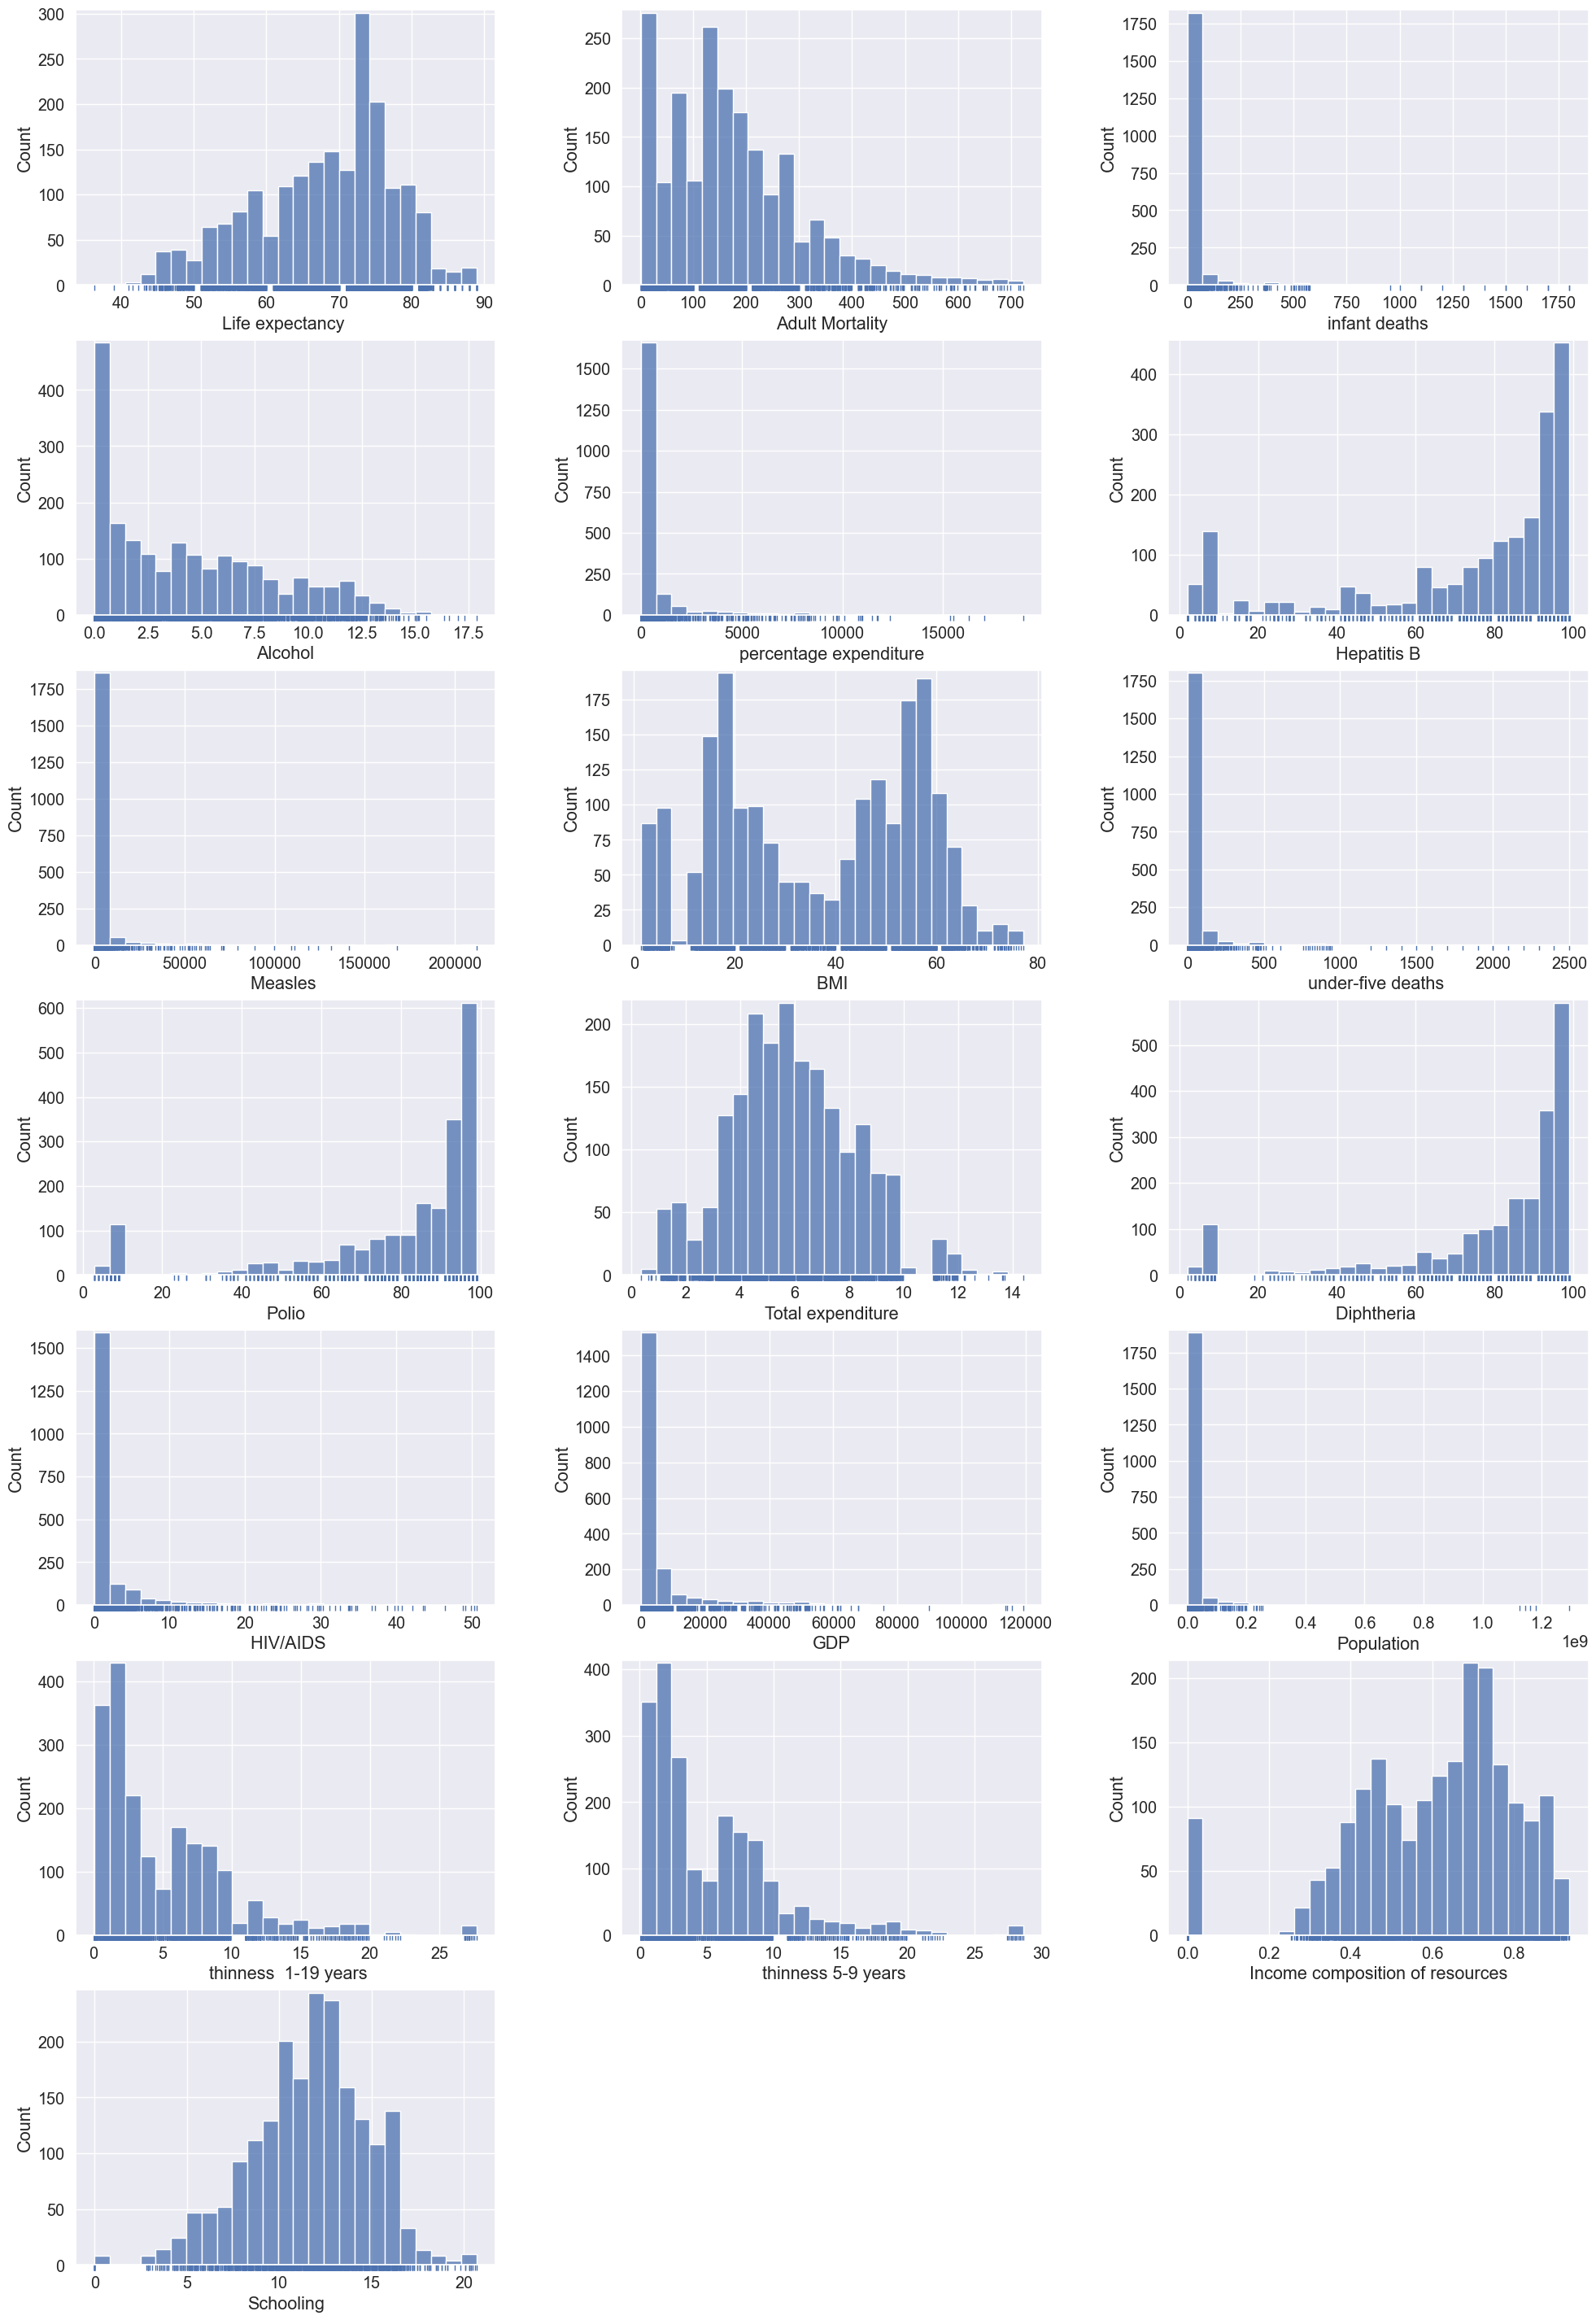

In [65]:
plt.figure(figsize=(24, 36))
plt.subplots_adjust(wspace=0.3, hspace=None)
i = 1
for col_name in column_numeric:
    plt.subplot(7,3,i)
    sns.histplot(data = loaded_data[col_name],  bins = 25)
    sns.rugplot(data = loaded_data[col_name], height=-0.02, clip_on=False)
    i +=1

# Boxplots

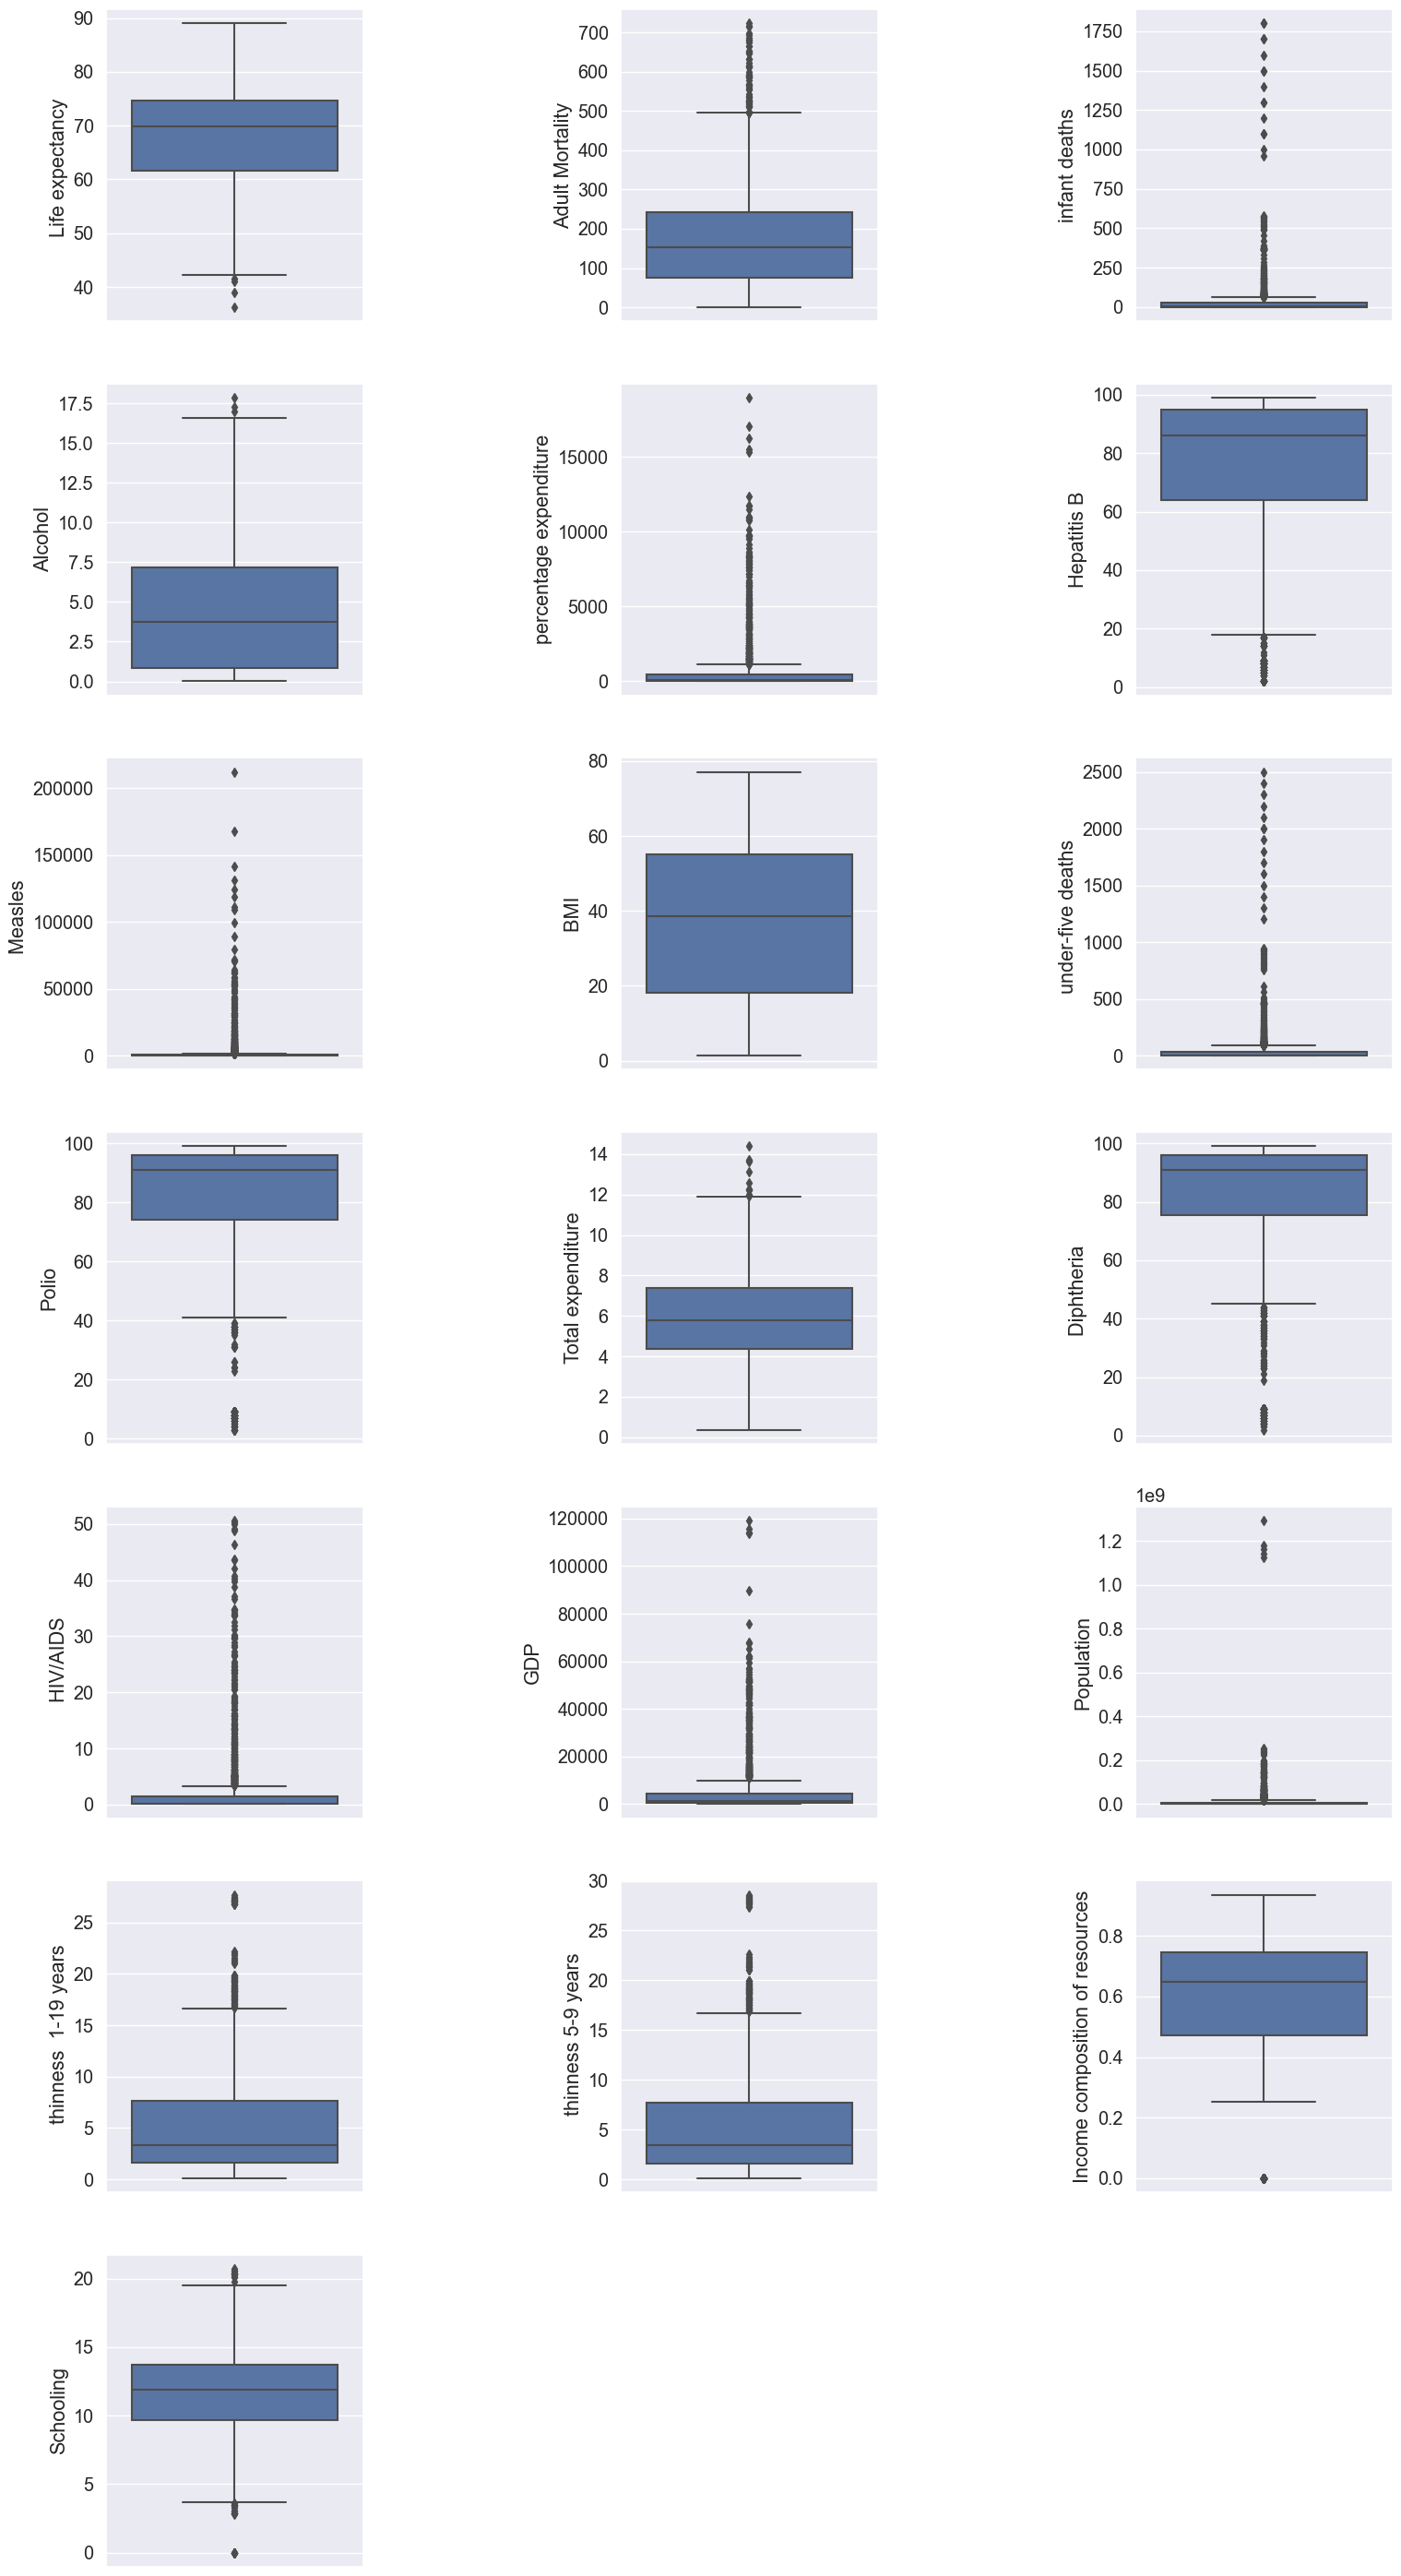

In [49]:
plt.figure(figsize=(18,36))
plt.subplots_adjust(wspace=1, hspace=None)


i = 1
for col_name in column_numeric:
    plt.subplot(7,3,i)
    sns.boxplot(data=loaded_data, y=col_name)
    i +=1

# Variance

In [50]:
loaded_data.var()

C:\Users\VIP\AppData\Local\Temp\ipykernel_19840\1283691619.py:1: FutureWarning:

The default value of numeric_only in DataFrame.var is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.



Year                                            18.69
Life expectancy                                 94.21
Adult Mortality                              17323.02
infant deaths                                19261.25
Alcohol                                         15.81
percentage expenditure                     3103477.84
Hepatitis B                                    842.63
Measles                                  146467822.96
 BMI                                           389.52
under-five deaths                            35695.72
Polio                                          593.57
Total expenditure                                5.23
Diphtheria                                     597.81
 HIV/AIDS                                       36.06
GDP                                      131809006.29
Population                        4212156552058814.00
 thinness  1-19 years                           22.56
 thinness 5-9 years                             23.47
Income composition of resour

# Covariance

In [51]:
covariance = loaded_data.cov()
covariance

C:\Users\VIP\AppData\Local\Temp\ipykernel_19840\3667916131.py:1: FutureWarning:

The default value of numeric_only in DataFrame.cov is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
Year,18.69,7.20,-41.03,-22.56,-0.81,678.55,31.03,-5208.73,8.20,-34.70,12.39,0.73,17.55,-3.70,5923.97,6390244.31,-0.97,-1.12,0.22,3.13
Life expectancy,7.20,94.21,-843.84,-216.78,15.15,7073.76,70.33,-16226.59,114.86,-343.74,98.18,4.42,105.12,-33.60,49434.97,-6828428.48,-21.15,-21.16,1.45,23.22
Adult Mortality,-41.03,-843.84,17323.02,699.68,-94.98,-56212.91,-394.98,-11578.53,-967.66,1314.58,-667.00,-29.12,-676.23,423.86,-388276.19,-191371365.76,174.33,181.45,-11.15,-170.91
infant deaths,-22.56,-216.78,699.68,19261.25,-57.62,-21948.61,-874.01,856185.23,-623.88,26135.31,-514.47,-46.97,-530.95,1.45,-155704.03,5069350911.45,317.48,327.82,-3.92,-87.32
Alcohol,-0.81,15.15,-94.98,-57.62,15.81,3018.30,12.28,-1407.83,29.77,-74.92,23.24,2.07,23.87,-0.81,20915.62,-6595735.13,-7.53,-7.46,0.44,7.54
percentage expenditure,678.55,7073.76,-56212.91,-21948.61,3018.30,3103477.84,-589.64,-1477846.13,9658.28,-30780.88,6979.06,874.87,7275.45,-1160.31,19480629.55,-1898697043.17,-2245.58,-2288.28,148.15,2415.77
Hepatitis B,31.03,70.33,-394.98,-874.01,12.28,-589.64,842.63,-49906.50,113.79,-1242.27,319.17,8.66,392.30,-18.13,3025.07,-174111277.37,-23.01,-25.48,1.43,25.08
Measles,-5208.73,-16226.59,-11578.53,856185.23,-1407.83,-1477846.13,-49906.50,146467822.96,-40168.54,1187110.66,-33487.78,-3090.56,-35457.84,1424.43,-10262263.38,211948050842.83,13105.07,13093.25,-343.21,-5701.43
BMI,8.20,114.86,-967.66,-623.88,29.77,9658.28,113.79,-40168.54,389.52,-888.03,127.30,10.55,128.65,-28.35,68093.24,-91335451.02,-52.59,-54.30,2.20,37.10
under-five deaths,-34.70,-343.74,1314.58,26135.31,-74.92,-30780.88,-1242.27,1187110.66,-888.03,35695.72,-782.47,-64.10,-819.04,15.19,-219954.93,6728892942.10,434.33,447.34,-6.11,-129.10


# Correlation
### Pearson

C:\Users\VIP\AppData\Local\Temp\ipykernel_19840\3164708871.py:3: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



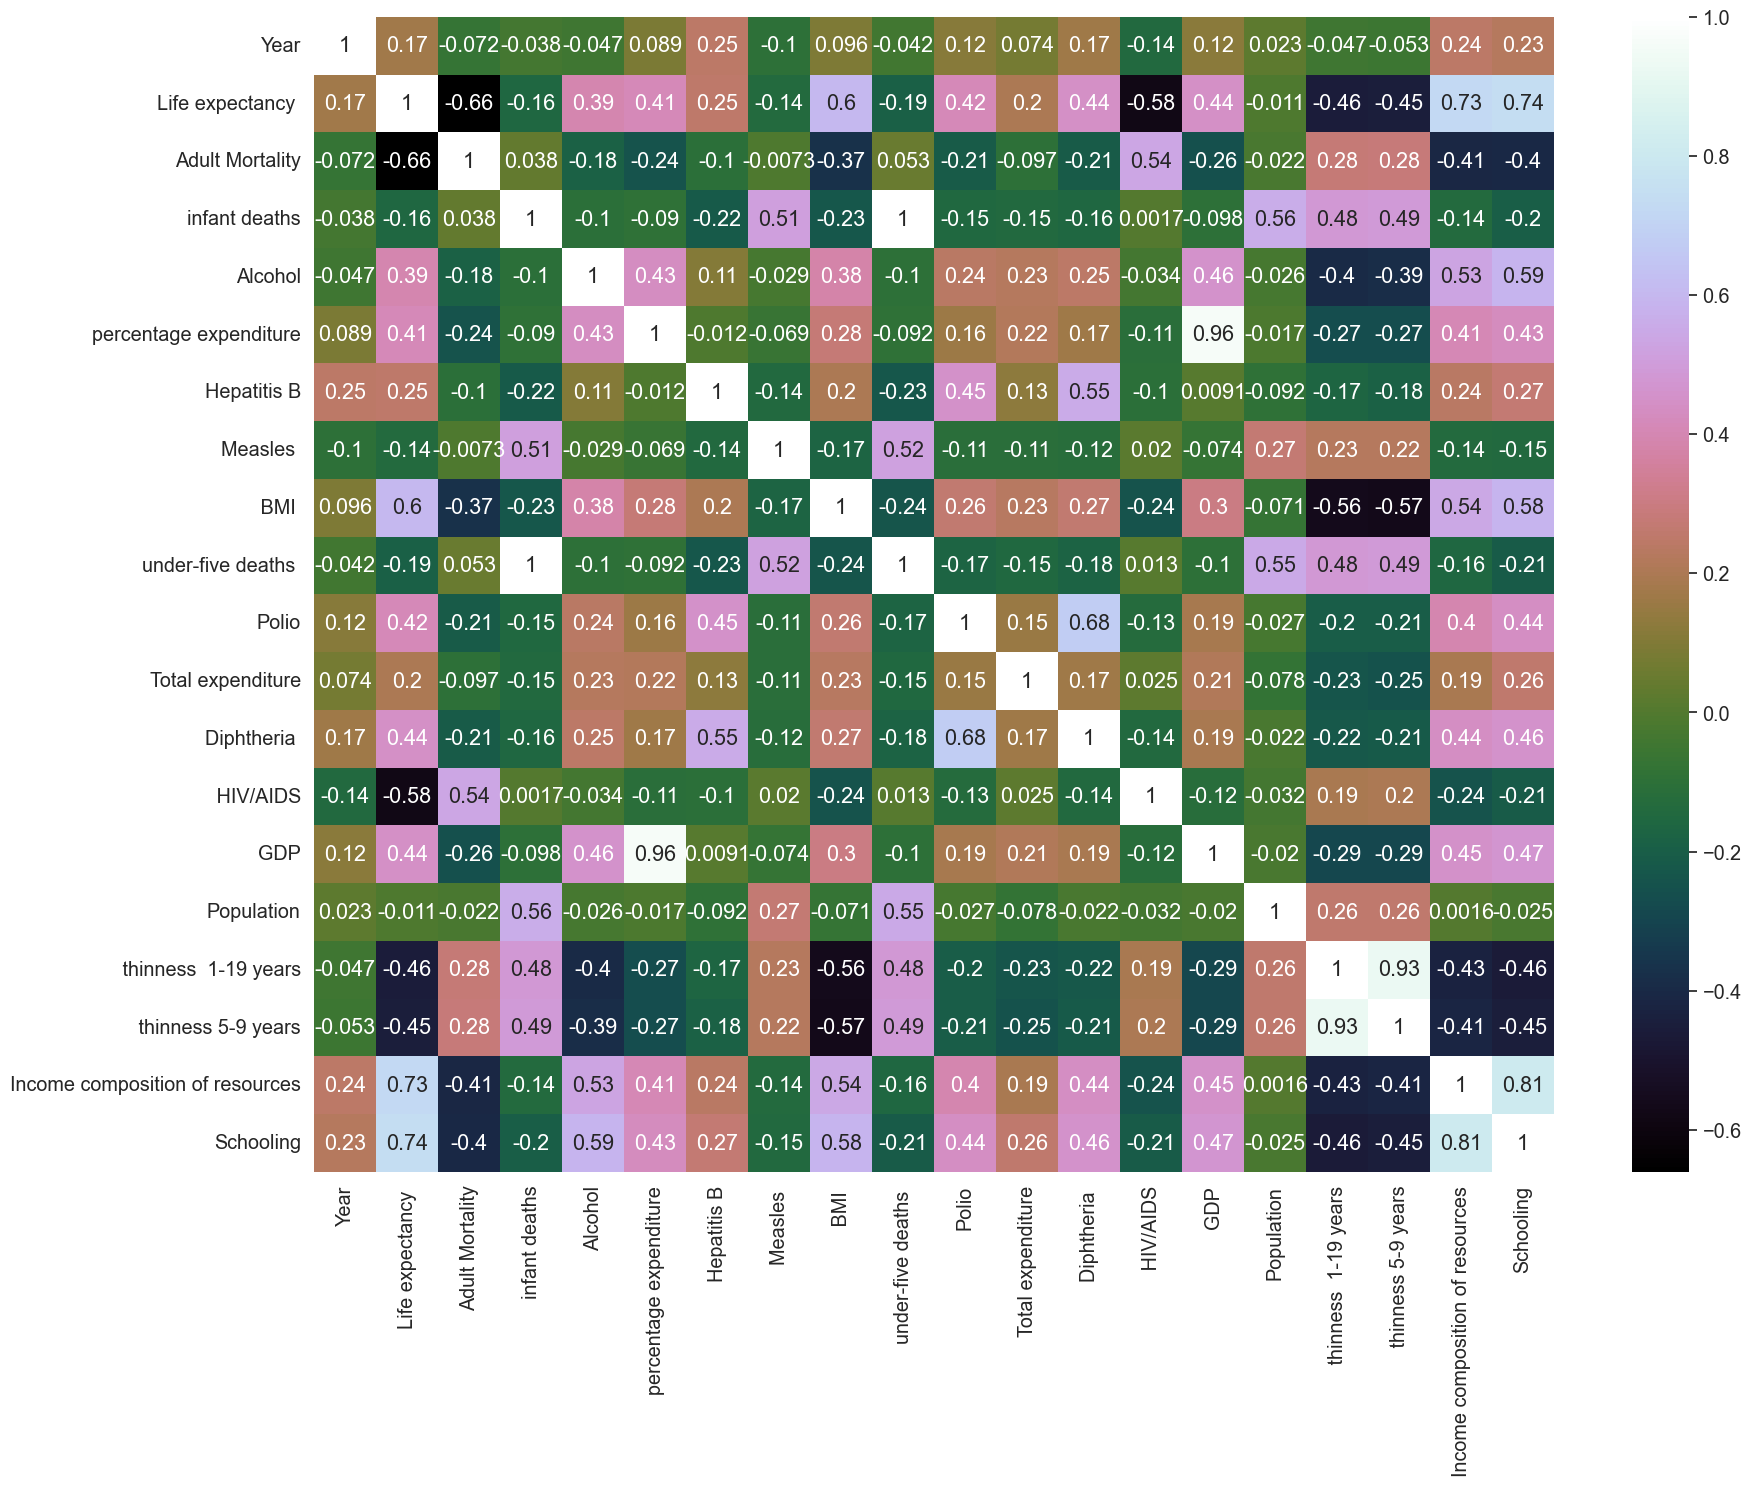

In [52]:
plt.figure(figsize=(20,15))
cmap = sns.color_palette("cubehelix", as_cmap=True)
sns.heatmap(loaded_data.corr(), annot=True, cmap=cmap)
plt.show()

C:\Users\VIP\AppData\Local\Temp\ipykernel_19840\2398354181.py:2: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



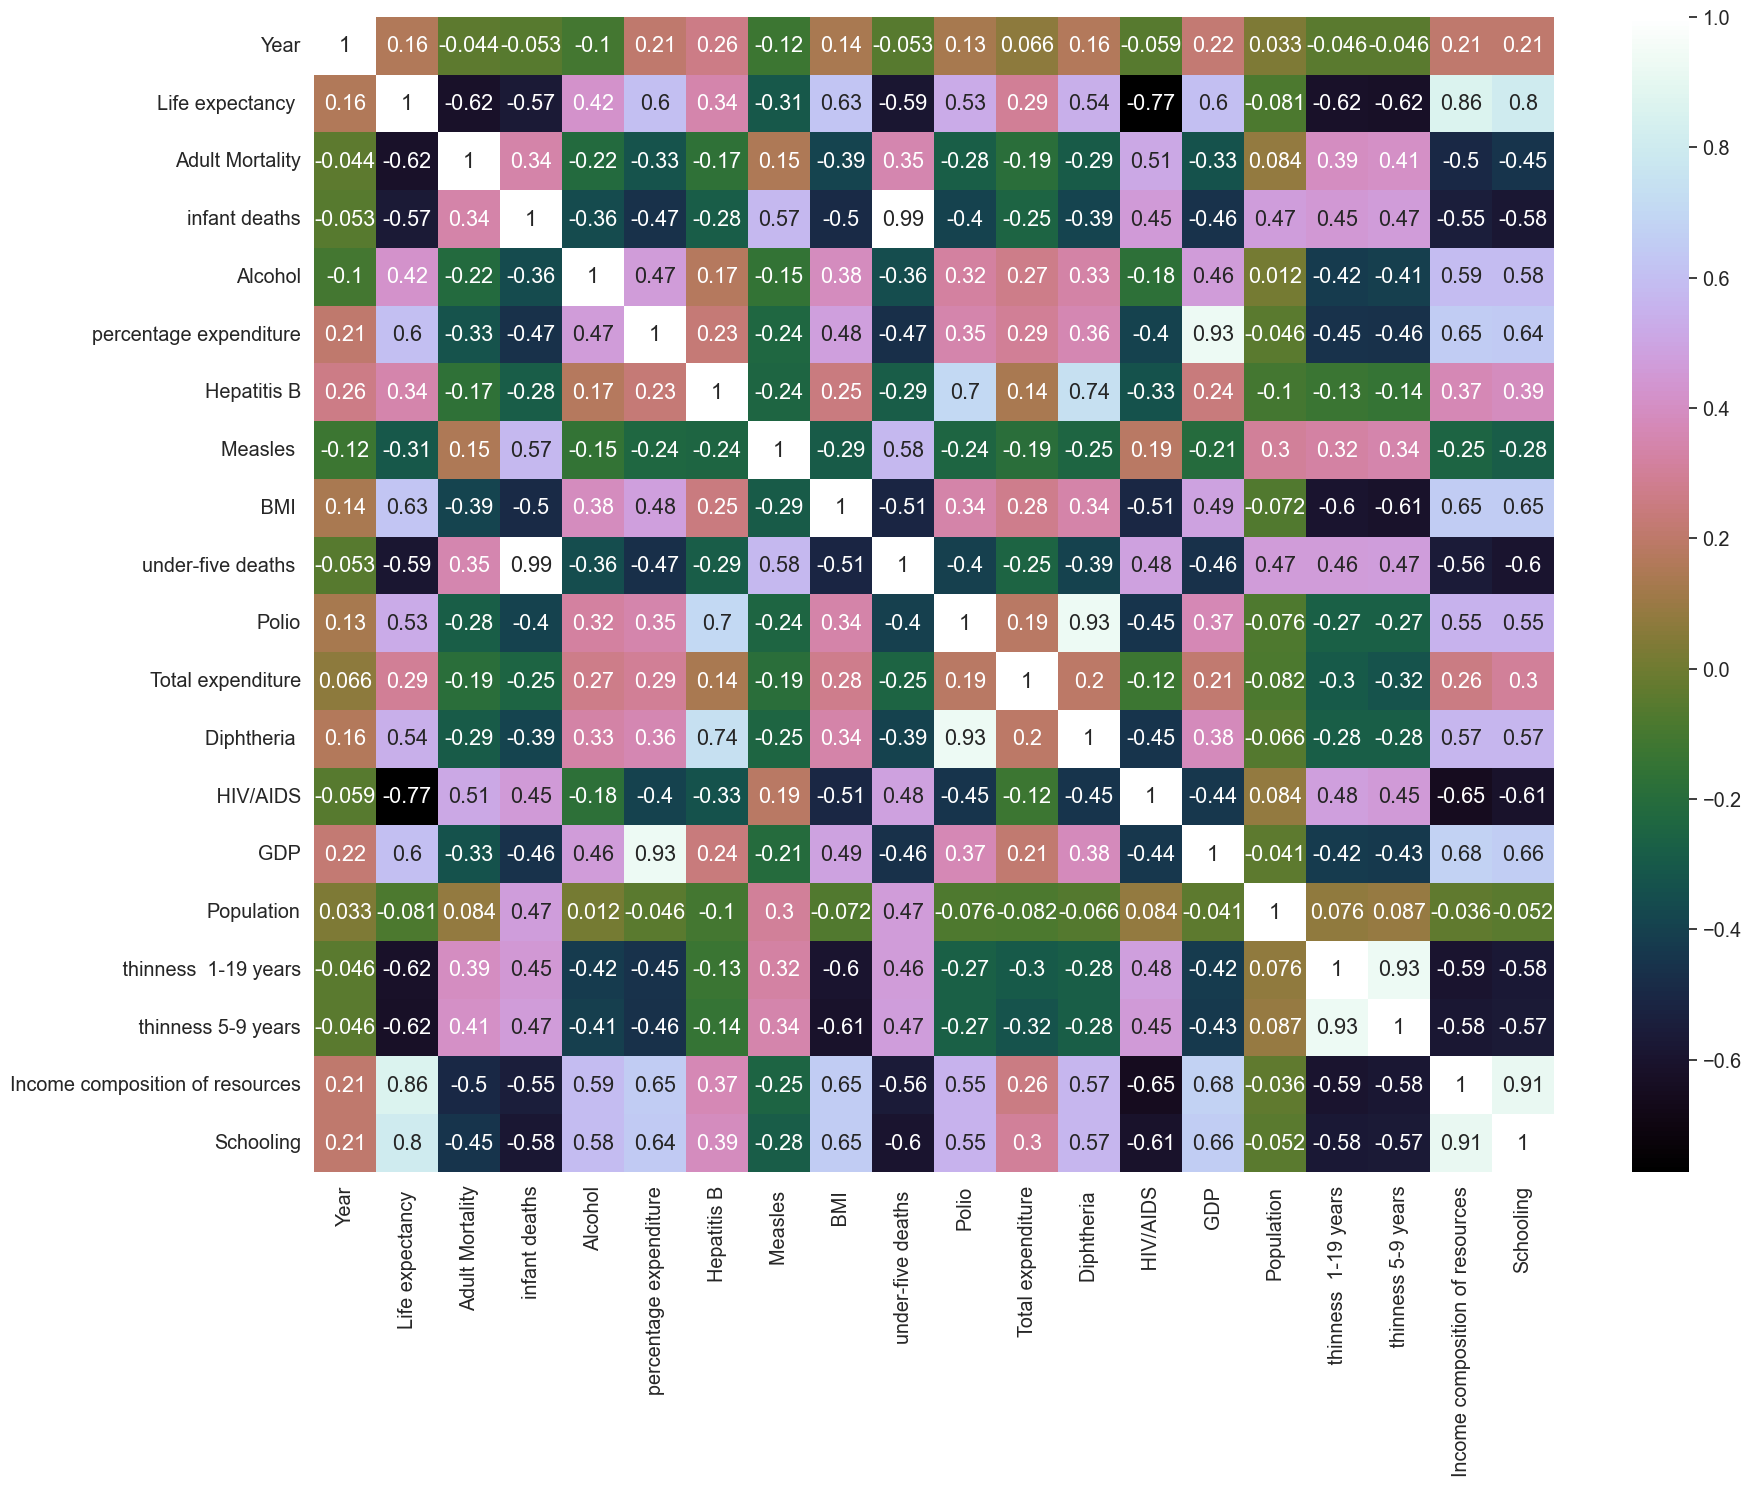

In [53]:
plt.figure(figsize=(20,15))
sns.heatmap(loaded_data.corr(method="spearman"), annot=True, cmap=cmap)
plt.show()

> Напочатку були враховані демографічні змінні, структура доходу та рівень смертності.
Зараз прослідковується те, що кількість населення зовсім не впливає. Більш істотний вплив на очікувану тривалість життя мають: BMI (Average Body Mass Index of entire population), Income composition of resources (Human Development Index in terms of income composition of resources (index ranging from 0 to 1)), Number of years of Schooling(years), percentage expenditure (Expenditure on health as a percentage of Gross Domestic Product per capita(%)). Так само зворотній вплив мають: HIV/AIDS (Deaths per 1 000 live births HIV/AIDS (0-4 years)), thinness (Prevalence of thinness among children and adolescents for Age 5 to 9 and 10 to 19 (% ))

In [54]:
import plotly.express as px
fig = px.scatter(loaded_data.groupby('Country').mean(),x='Life expectancy ',y='percentage expenditure',color='GDP',template='seaborn',title='<b> Life expectancy vs Percentage expenditure', opacity=0.5)
fig.update_traces(marker={'size': 10})
"""px.scatter(loaded_data,x='Life expectancy ',y='percentage expenditure',color='Country',template='seaborn',title='<b> Life expectancy vs Percentage expenditure')"""
fig

C:\Users\VIP\AppData\Local\Temp\ipykernel_19840\381295882.py:2: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



> Можемо побачити з графіка, що для зібльшення тривалості життя до 65+ країна має збільшити витрати на систему охорони здоров'я.

In [55]:
px.scatter(loaded_data.sort_values(by='Year'),y='infant deaths',x='Life expectancy ',template='seaborn',color='Country',opacity=0.6,title='<b>Life expectancy vs Infant deaths of countries every year')

In [56]:
px.scatter(loaded_data.sort_values(by='Year'),y='Adult Mortality',x='Life expectancy ',template='seaborn',color='Country',opacity=0.6,title='<b>Life expectancy vs Adult mortality of countries every year')

> Рівень дорослої смертності обернено пропорційно впливає на очікувану тривалість життя.

In [57]:
px.scatter(loaded_data,y=' BMI ',x='Life expectancy ',template='seaborn',color='Country',opacity=0.6,title='<b>Life expectancy vs BMI')

In [58]:
px.scatter(loaded_data,y='Alcohol',x='Life expectancy ',template='seaborn',color='Country',opacity=0.6,title='<b>Life expectancy vs Alcohol consumption')

Тривалість навчання дуже сильно позитивно корелює з тривалістю життя (0.8)

In [59]:
px.scatter(loaded_data,y='Schooling',x='Life expectancy ',template='seaborn',color='Country',opacity=0.6,title='<b>Life expectancy vs Alcohol consumption')

Тут можемо зробити висновки, що тривалість життя майже ніяк не корелює з кількістю населення країни. Проте дитяча смертність помітно корелює з нею.

Також можна зазначити, що імунізація від дифтерії (0.44), поліолмієліту (0.42) та в меншій мірі гепатиту Б (0.25) суттєво коредюють з тривалістю життя.